<a href="https://colab.research.google.com/github/insanemate033-gif/AAPL_stock_prediction/blob/main/Apple_Stock_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!pip install yfinance
import pandas as pd
import yfinance as yf
import plotly.express as px
from datetime import datetime

In [92]:

start_date = datetime.now() - pd.DateOffset(years=3)
end_date = datetime.now()

In [93]:
tickers = ['AAPL']

In [94]:

start_date = datetime.now() - pd.DateOffset(years=3)
end_date = datetime.now()

tickers = ['AAPL']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)
df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df = df.drop(['Adj Close', 'Volume'], axis=1)
df = df.reset_index() # we have to reset index
file_to_save = '3yearstock_data.csv' # Define the file name to save the data
print('Data saved to : %s' % file_to_save) # Correct the indentation
df.to_csv(file_to_save)
print(df.head(10))

[*********************100%%**********************]  1 of 1 completed

Data saved to : 3yearstock_data.csv
  Ticker       Date        Open        High         Low       Close
0   AAPL 2021-08-04  147.270004  147.789993  146.279999  146.949997
1   AAPL 2021-08-05  146.979996  147.839996  146.169998  147.059998
2   AAPL 2021-08-06  146.350006  147.110001  145.630005  146.139999
3   AAPL 2021-08-09  146.199997  146.699997  145.520004  146.089996
4   AAPL 2021-08-10  146.440002  147.710007  145.300003  145.600006
5   AAPL 2021-08-11  146.050003  146.720001  145.529999  145.860001
6   AAPL 2021-08-12  146.190002  149.050003  145.839996  148.889999
7   AAPL 2021-08-13  148.970001  149.440002  148.270004  149.100006
8   AAPL 2021-08-16  148.539993  151.190002  146.470001  151.119995
9   AAPL 2021-08-17  150.229996  151.679993  149.089996  150.190002


In [95]:
import pandas as pd
import numpy as np
from datetime import datetime

In [96]:
gstock_data = pd.read_csv('3yearstock_data.csv')
gstock_data .head(15)

,Unnamed: 0,Ticker,Date,Open,High,Low,Close
0,0,AAPL,2021-08-04,147.270004,147.789993,146.279999,146.949997
1,1,AAPL,2021-08-05,146.979996,147.839996,146.169998,147.059998
2,2,AAPL,2021-08-06,146.350006,147.110001,145.630005,146.139999
3,3,AAPL,2021-08-09,146.199997,146.699997,145.520004,146.089996
4,4,AAPL,2021-08-10,146.440002,147.710007,145.300003,145.600006
5,5,AAPL,2021-08-11,146.050003,146.720001,145.529999,145.860001
6,6,AAPL,2021-08-12,146.190002,149.050003,145.839996,148.889999
7,7,AAPL,2021-08-13,148.970001,149.440002,148.270004,149.100006
8,8,AAPL,2021-08-16,148.539993,151.190002,146.470001,151.119995
9,9,AAPL,2021-08-17,150.229996,151.679993,149.089996,150.190002


In [97]:
import pandas as pd

# Load the CSV file
gstock_data = pd.read_csv("3yearstock_data.csv", index_col="Date", parse_dates=True)

# Select the desired columns
gstock_data = gstock_data[["Open", "Close"]]

# Display the table
print(gstock_data)

                  Open       Close
Date                              
2021-08-04  147.270004  146.949997
2021-08-05  146.979996  147.059998
2021-08-06  146.350006  146.139999
2021-08-09  146.199997  146.089996
2021-08-10  146.440002  145.600006
...                ...         ...
2024-07-29  216.960007  218.240005
2024-07-30  219.190002  218.800003
2024-07-31  221.440002  222.080002
2024-08-01  224.369995  218.360001
2024-08-02  219.149994  219.860001

[754 rows x 2 columns]


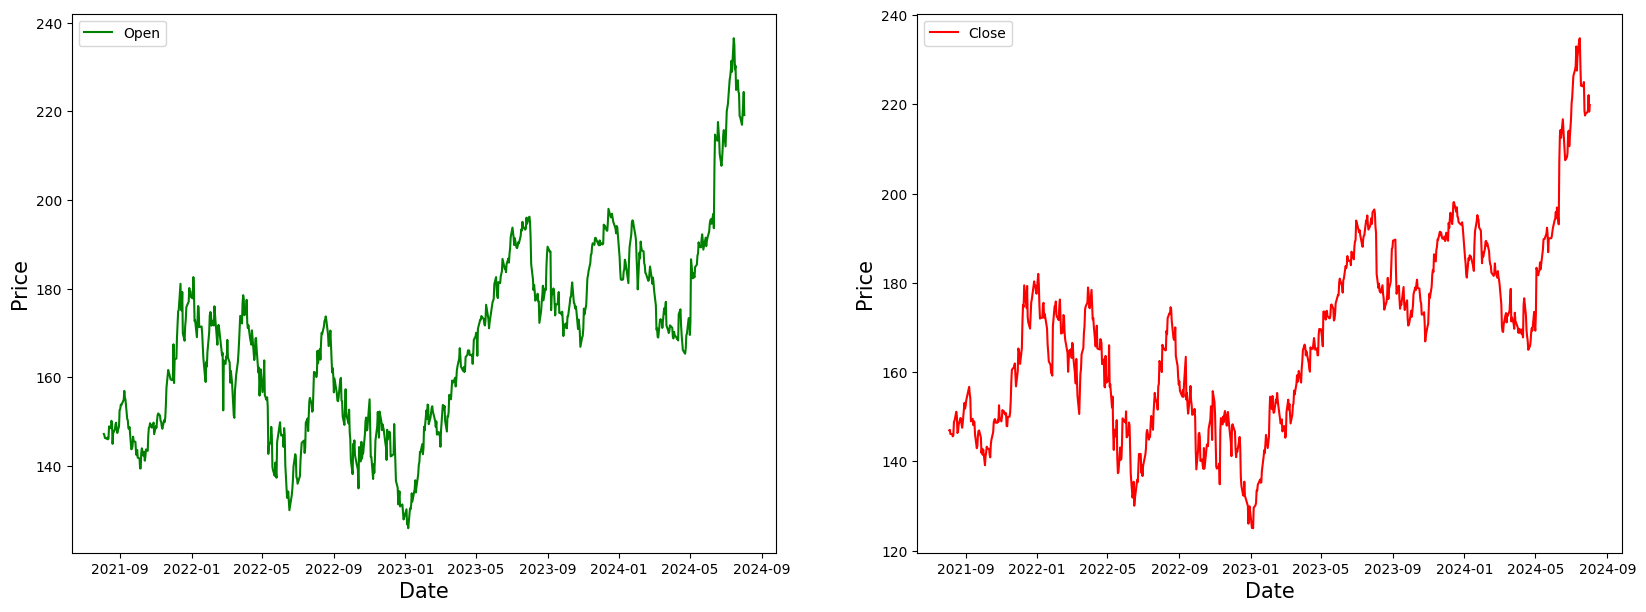

In [98]:
import plotly.express as px
import matplotlib.pyplot as plt
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(gstock_data ['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(gstock_data ['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fg.show()

In [99]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()

# Select only the numerical columns for scaling
numerical_cols = ['Open', 'Close']
gstock_data[numerical_cols] = Ms.fit_transform(gstock_data[numerical_cols])

training_size = round(len(gstock_data) * 0.80)

train_data = gstock_data[:training_size]
test_data  = gstock_data[training_size:]
print(train_data.shape)
print(test_data.shape)
print(gstock_data.shape)
print(test_data)


(603, 2)
(151, 2)
(754, 2)
                Open     Close
Date                          
2023-12-27  0.601792  0.620492
2023-12-28  0.616729  0.624408
2023-12-29  0.614556  0.614845
2024-01-02  0.553453  0.552095
2024-01-03  0.526930  0.539435
...              ...       ...
2024-07-29  0.823301  0.848998
2024-07-30  0.843487  0.854098
2024-07-31  0.863854  0.883971
2024-08-01  0.890377  0.850091
2024-08-02  0.843125  0.863752

[151 rows x 2 columns]


In [100]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [101]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [102]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  # Ensure the stop index does not exceed the dataset length
  for stop_idx in range(50, len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 50, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,902 (120.71 KB)

 Trainable params: 30,902 (120.71 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)
test_predicted = model.predict(test_seq)
test_inverse_predicted = Ms.inverse_transform(test_predicted)

Epoch 1/80
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 0.0856 - mean_absolute_error: 0.2377 - val_loss: 0.0390 - val_mean_absolute_error: 0.1643
Epoch 2/80
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0081 - mean_absolute_error: 0.0720 - val_loss: 0.0094 - val_mean_absolute_error: 0.0797
Epoch 3/80
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0054 - mean_absolute_error: 0.0591 - val_loss: 0.0068 - val_mean_absolute_error: 0.0663
Epoch 4/80
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0045 - mean_absolute_error: 0.0539 - val_loss: 0.0061 - val_mean_absolute_error: 0.0614
Epoch 5/80
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0035 - mean_absolute_error: 0.0476 - val_loss: 0.0047 - val_mean_absolute_error: 0.0544
Epoch 6/80
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0036 - mean_absolute_error: 0.0490 - val_loss: 0.0056 - val_mean_absolute_error: 0.0572
Epoch 7/80
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0032 - mean_absolute_error: 0.0466 - va


**Visualization**


After fitting the data with our model we use it for prediction. We must use inverse transformation to get back the original value with the transformed function. Now we can use this data to visualize the short-term stock price change predictions

In [104]:
# Merging actual and predicted data for better visualization
# Get the last n rows of gstock_data, where n is the number of predictions
num_predictions = len(test_inverse_predicted)
gs_slic_data = pd.concat([gstock_data.iloc[-num_predictions:].copy(),
                         pd.DataFrame(test_inverse_predicted,
                                      columns=['open_predicted','close_predicted'],
                                      index=gstock_data.iloc[-num_predictions:].index)],
                        axis=1)

gs_slic_data[['Open','Close']] = Ms.inverse_transform(gs_slic_data[['Open','Close']])

In [105]:
gs_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2024-03-11,172.940002,172.750000,169.643921,168.790390
2024-03-12,173.149994,173.229996,171.965424,171.181137
2024-03-13,172.770004,171.130005,173.462021,172.900818
2024-03-14,172.910004,173.000000,172.788208,172.487656
2024-03-15,171.169998,172.619995,172.700058,172.405350


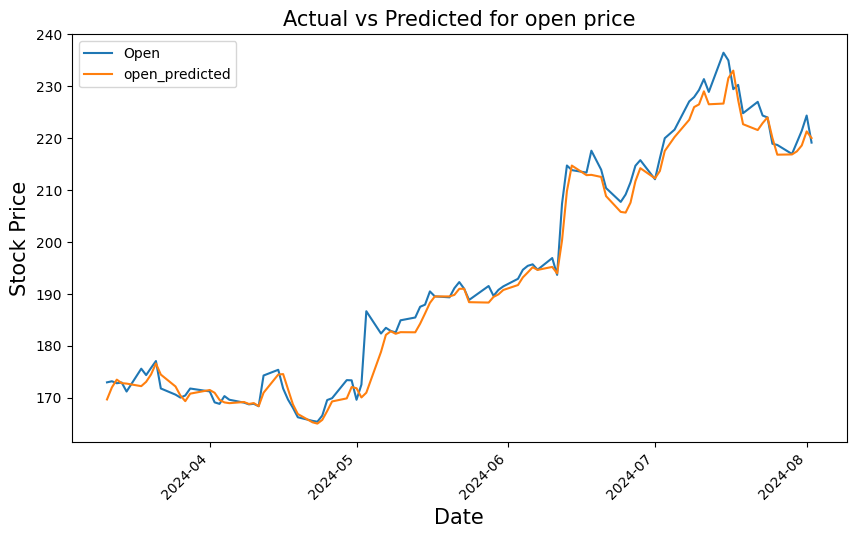

In [106]:
gs_slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()


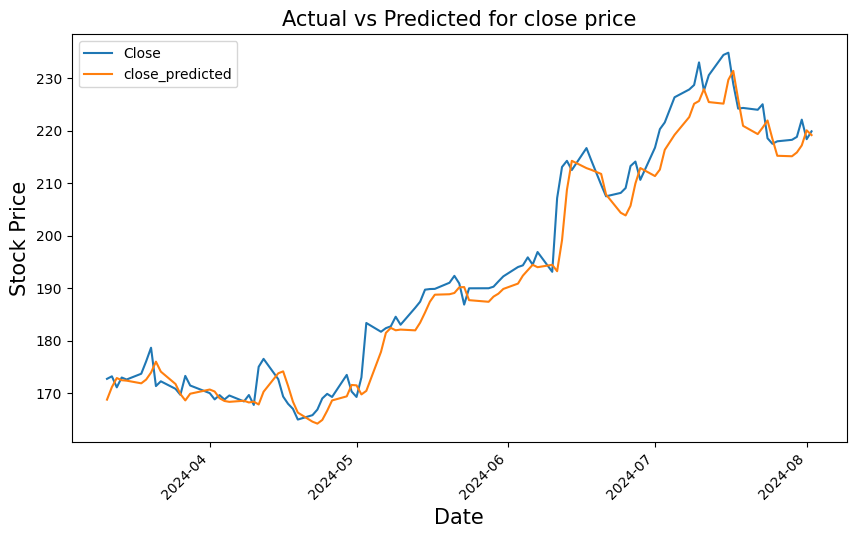

In [107]:
gs_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()


**Challenges**


Even though LSTMs offer advantages for predicting stock market prices, there are still challenges to consider:

Data Quality and Noise:

Stock prices are influenced by a multitude of factors, many of which are unpredictable (e.g., news events, social media sentiment). LSTMs might struggle to differentiate between relevant patterns and random noise in the data, potentially leading to inaccurate predictions.

Limited Historical Data:

 The effectiveness of LSTMs depends on the quality and quantity of historical data available. For newer companies or less liquid stocks, there might not be enough data to train the model effectively, limiting its ability to capture long-term trends.

Non-Linear Relationships:

While LSTMs can handle complex relationships, the stock market can exhibit sudden shifts and non-linear behavior due to unforeseen events. The model might not be able to perfectly capture these unpredictable fluctuations.

Overfitting and Generalizability:

 There’s a risk of the model overfitting the training data, performing well on historical data but failing to generalize to unseen future patterns. Careful hyperparameter tuning and validation techniques are crucial to ensure the model can learn generalizable insights.

Self-Fulfilling Prophecies:

If a large number of investors rely on LSTM predictions, their collective actions could influence the market in a way that aligns with the prediction, creating a self-fulfilling prophecy. This highlights the importance of using these predictions as a potential guide, not a guaranteed outcome.


Despite these challenges, LSTM algorithm remain a good predictor for analyzing stock price data. By understanding these limitations and implementing best practices, you can leverage the strengths of LSTMs to gain valuable insights into the financial markets.

